# PCA Attributes in `sklearn`

The `PCA` class in `scikit-learn` provides several important attributes that allow you to understand the results of your Principal Component Analysis. Below is a summary of the key attributes and what they do:

## 1. `explained_variance_`
- **What it is**: The amount of variance explained by each of the selected components.
- **How to use it**: This attribute tells you how much of the total variance in the data is captured by each principal component. Higher values indicate that a principal component is more important for explaining the variability in the data.

# Explained Variance Formula

Given that you have `n` eigenvalues, the **explained variance** for the i-th principal component is calculated as:

$$
\text{Explained Variance (PC}_i) = \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

Where:
- $\lambda_i$ is the eigenvalue corresponding to the i-th principal component.
- $\sum_{j=1}^{n} \lambda_j$ is the sum of all eigenvalues, representing the total variance in the data.

The explained variance tells you how much of the total variance in the data is captured by the i-th principal component.

# Cumulative Variance Formula

The **cumulative variance** up to the k-th principal component is the sum of the explained variances of the first `k` components:

$$
\text{Cumulative Variance (PC}_k) = \sum_{i=1}^{k} \frac{\lambda_i}{\sum_{j=1}^{n} \lambda_j}
$$

This tells you how much of the total variance is captured by the first `k` principal components combined.


## 2. `explained_variance_ratio_`
- **What it is**: The proportion of the variance explained by each component.
- **How to use it**: This is the ratio of explained variance for each principal component relative to the total variance in the data. It is useful for determining how many principal components are needed to explain most of the variance in the data.

## 3. `components_`
- **What it is**: The principal axes in the feature space, representing the directions of maximum variance.
- **How to use it**: Each row in this array corresponds to a principal component, and each column corresponds to the weight (loading) of an original feature in that principal component. It tells you how much each original feature contributes to the principal components.

## 4. `singular_values_`
- **What it is**: The singular values corresponding to each of the selected components.
- **How to use it**: Singular values are related to the variance explained by each component. They are the square roots of the eigenvalues of the covariance matrix of the input data.

## 5. `mean_`
- **What it is**: The mean value for each feature in the training set.
- **How to use it**: PCA centers the data before computing the principal components. This attribute provides the mean values of the original features, which can be used to transform new data to the same centered space.

## 6. `n_components_`
- **What it is**: The number of components extracted from the input data.
- **How to use it**: After performing PCA, this attribute shows how many components have been extracted, either based on the number of components you specified or based on the amount of variance retained (if you specified `n_components` as a float).

## 7. `n_features_`
- **What it is**: The number of features in the training data.
- **How to use it**: This shows how many features were in the original dataset before PCA was applied.

## 8. `n_samples_`
- **What it is**: The number of samples in the training data.
- **How to use it**: This attribute stores the number of data points used to fit the PCA model.

## 9. `noise_variance_`
- **What it is**: The estimated noise variance in the data, used when `PCA` is fitted with `svd_solver='auto'`.
- **How to use it**: This attribute is relevant for cases where you specify the number of components as a fraction of the explained variance, and it gives an estimate of how much variance might be due to noise.


```python
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)

# Access PCA attributes
print("Explained Variance:", pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Eigenvectors):", pca.components_)
print("Singular Values:", pca.singular_values_)
print("Mean of each feature:", pca.mean_)
```

In [4]:
import numpy as np
import pandas as pd

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


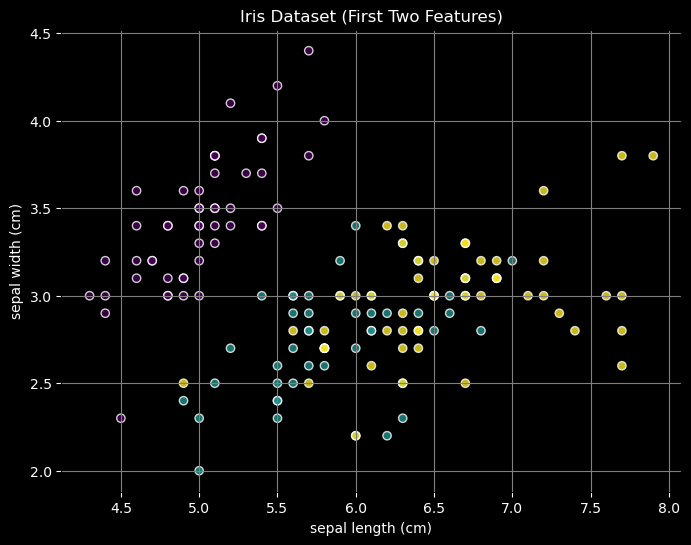

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Take the first two columns (features)
y_iris = iris.target  # Target labels (species)

# Plot the first two columns of the iris dataset with a black background
plt.figure(figsize=(8, 6), facecolor='black')
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', edgecolor='w', alpha=0.8)
plt.title("Iris Dataset (First Two Features)", color='white')
plt.xlabel(iris.feature_names[0], color='white')
plt.ylabel(iris.feature_names[1], color='white')
plt.grid(True)

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.show()


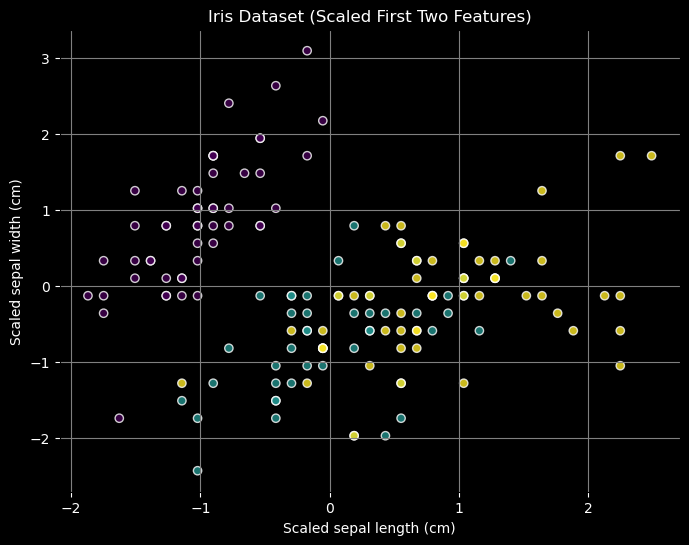

In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the first two columns of the Iris dataset
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Plot the scaled first two columns of the iris dataset with a black background
plt.figure(figsize=(8, 6), facecolor='black')
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', edgecolor='w', alpha=0.8)
plt.title("Iris Dataset (Scaled First Two Features)", color='white')
plt.xlabel("Scaled " + iris.feature_names[0], color='white')
plt.ylabel("Scaled " + iris.feature_names[1], color='white')
plt.grid(True)

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.show()


In [7]:
# Compute the covariance matrix for the first two scaled features
cov_matrix = np.cov(X_iris_scaled.T)

# Print the covariance matrix
print('cov_matrix is :', cov_matrix)


cov_matrix is : [[ 1.00671141 -0.11835884]
 [-0.11835884  1.00671141]]


In [8]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the eigenvalues and corresponding eigenvectors
for i, eigenvalue in enumerate(eigenvalues):
    print(f"The eigenvalue {eigenvalue:.4f} has eigenvector {eigenvectors[:, i]}")


The eigenvalue 0.8884 has eigenvector [-0.70710678 -0.70710678]
The eigenvalue 1.1251 has eigenvector [ 0.70710678 -0.70710678]


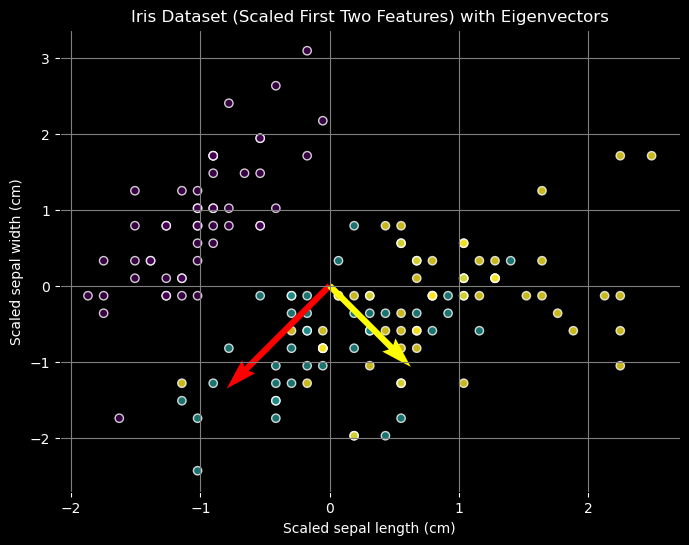

In [9]:
# Plot the scaled data
plt.figure(figsize=(8, 6), facecolor='black')
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', edgecolor='w', alpha=0.8)
plt.title("Iris Dataset (Scaled First Two Features) with Eigenvectors", color='white')
plt.xlabel("Scaled " + iris.feature_names[0], color='white')
plt.ylabel("Scaled " + iris.feature_names[1], color='white')

# Plot the first eigenvector in red and the second in yellow
origin = np.mean(X_iris_scaled, axis=0)  # Center of the data

# First eigenvector in red
plt.quiver(origin[0], origin[1], eigenvectors[0, 0], eigenvectors[1, 0], 
           scale=eigenvalues[0], scale_units='x', color='red', width=0.01)

# Second eigenvector in yellow
plt.quiver(origin[0], origin[1], eigenvectors[0, 1], eigenvectors[1, 1], 
           scale=eigenvalues[1], scale_units='x', color='yellow', width=0.01)

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.show()


In [10]:
# Sorting the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1] #The [::-1] reverses this order, making it descending: 
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the sorted eigenvalues and corresponding eigenvectors
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Sorted eigenvalue {eigenvalue:.4f} has eigenvector {sorted_eigenvectors[:, i]}")


Sorted eigenvalue 1.1251 has eigenvector [ 0.70710678 -0.70710678]
Sorted eigenvalue 0.8884 has eigenvector [-0.70710678 -0.70710678]


In [11]:
# Create a 2x2 matrix with sorted eigenvectors
eigen_matrix = sorted_eigenvectors[:, :2]

# Display the matrix
print("2x2 Matrix of the first two sorted eigenvectors:")
print(eigen_matrix)



2x2 Matrix of the first two sorted eigenvectors:
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


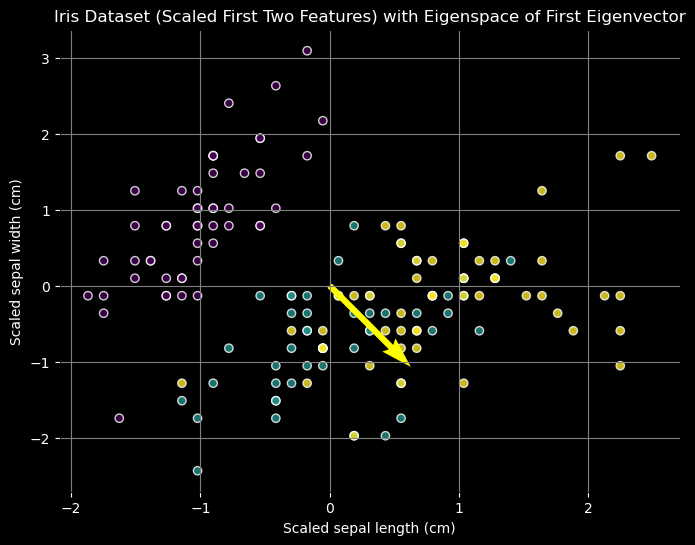

In [12]:
# Plot the scaled data
plt.figure(figsize=(8, 6), facecolor='black')
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', edgecolor='w', alpha=0.8)
plt.title("Iris Dataset (Scaled First Two Features) with Eigenspace of First Eigenvector", color='white')
plt.xlabel("Scaled " + iris.feature_names[0], color='white')
plt.ylabel("Scaled " + iris.feature_names[1], color='white')

# Plot the first sorted eigenvector in red
origin = np.mean(X_iris_scaled, axis=0)  # Center of the data

# First sorted eigenvector
plt.quiver(origin[0], origin[1], sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], 
           scale=sorted_eigenvalues[0], scale_units='x', color='yellow', width=0.01)

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.show()


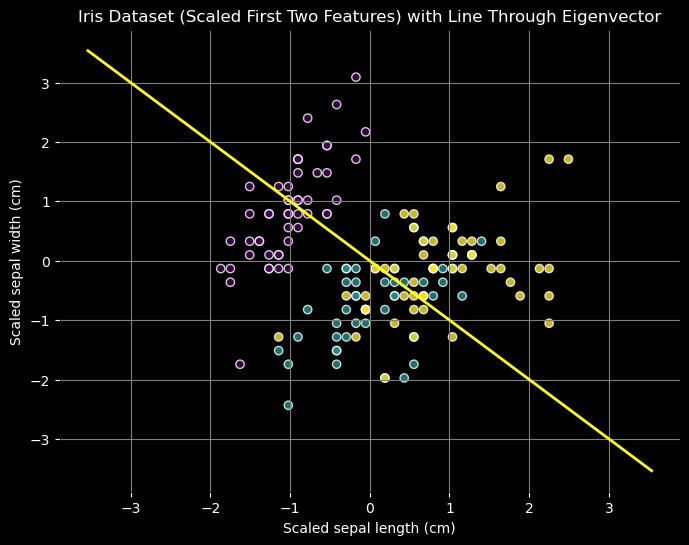

In [13]:
# Function to draw a line along the eigenvector
def draw_line_through_vector(origin, eigenvector, length=5, **kwargs):
    # Create two points far in the direction of the eigenvector
    start_point = origin - length * eigenvector
    end_point = origin + length * eigenvector
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], **kwargs)

# Plot the scaled data
plt.figure(figsize=(8, 6), facecolor='black')
plt.scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', edgecolor='w', alpha=0.8)
plt.title("Iris Dataset (Scaled First Two Features) with Line Through Eigenvector", color='white')
plt.xlabel("Scaled " + iris.feature_names[0], color='white')
plt.ylabel("Scaled " + iris.feature_names[1], color='white')

# Plot the first sorted eigenvector and draw a line through it
origin = np.mean(X_iris_scaled, axis=0)  # Center of the data

# First sorted eigenvector line
draw_line_through_vector(origin, sorted_eigenvectors[:, 0], color='yellow', linewidth=2)

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.show()



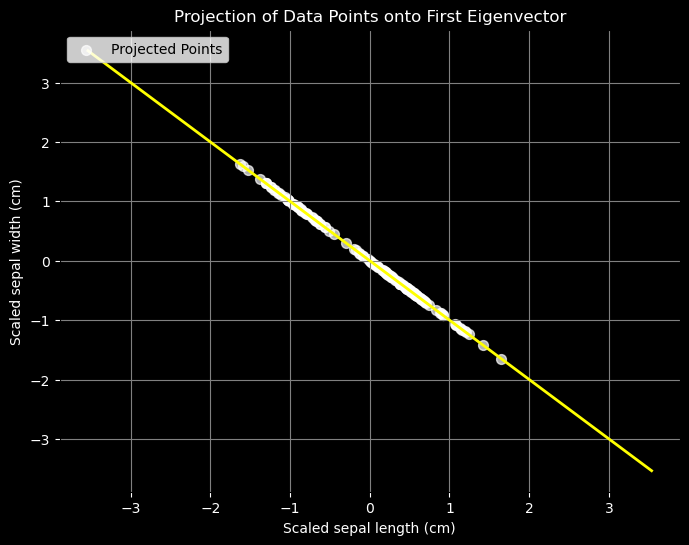

In [15]:
# Project data points onto the first eigenvector (line)
projected_points = (X_iris_scaled @ sorted_eigenvectors[:, 0].reshape(-1, 1)) * sorted_eigenvectors[:, 0]


# Plot only the projected points on the eigenvector line (red line)
plt.figure(figsize=(8, 6), facecolor='black')

# Plot the first sorted eigenvector line
draw_line_through_vector(origin, sorted_eigenvectors[:, 0], color='yellow', linewidth=2)

# Plot the projected points onto the eigenvector (in white)
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='white', s=50, alpha=0.7, label='Projected Points')

plt.title("Projection of Data Points onto First Eigenvector", color='white')
plt.xlabel("Scaled " + iris.feature_names[0], color='white')
plt.ylabel("Scaled " + iris.feature_names[1], color='white')

# Set black background and white grid lines
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')
plt.tick_params(colors='white')  # White ticks

plt.legend(loc="upper left", fontsize=10)
plt.show()



In [29]:
# Multiply X_iris with the 2x2 eigen matrix
transformed_data = np.dot(X_iris_scaled, eigen_matrix)

# Display the result
print("Transformed data after multiplying with the eigen matrix:")
print(transformed_data[:5])  # Displaying the 
print(transformed_data.shape)

Transformed data after multiplying with the eigen matrix:
[[-1.35742265 -0.08366712]
 [-0.71491142  0.90155859]
 [-1.21181606  0.74736845]
 [-1.13472099  0.99582077]
 [-1.60587497 -0.1607622 ]]
(150, 2)


In [30]:
import pandas as pd

# Create a DataFrame from the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=["f1'", "f2'"])

# Display the DataFrame
transformed_df.head()


,f1',f2'
0,-1.357423,-0.083667
1,-0.714911,0.901559
2,-1.211816,0.747368
3,-1.134721,0.995821
4,-1.605875,-0.160762


In [36]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Take the first two columns (features)

# Step 1: Standardize the features
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Step 2: Perform PCA using sklearn
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

# Print the eigenvalues and corresponding eigenvectors
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_

# Display the eigenvalues and their corresponding eigenvectors
for i, eigenvalue in enumerate(eigenvalues_sklearn):
    print(f"Eigenvalue {i + 1}: {eigenvalue:.4f}")
    print(f"Corresponding Eigenvector {i + 1}:\n{eigenvectors_sklearn[i]}\n")


# Print the sklearn PCA results
print("Explained Variance (sklearn):", pca.explained_variance_)
print("Explained Variance Ratio (sklearn):", pca.explained_variance_ratio_)
print("Principal Components (sklearn):\n", pca.components_)
print("\nPCA Transformed Data (sklearn) (First 5 rows):")
print(X_iris_pca[:5])  # Displaying the first 5 rows of transformed data


Eigenvalue 1: 1.1251
Corresponding Eigenvector 1:
[-0.70710678  0.70710678]

Eigenvalue 2: 0.8884
Corresponding Eigenvector 2:
[0.70710678 0.70710678]

Explained Variance (sklearn): [1.12507025 0.88835257]
Explained Variance Ratio (sklearn): [0.55878489 0.44121511]
Principal Components (sklearn):
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]

PCA Transformed Data (sklearn) (First 5 rows):
[[ 1.35742265  0.08366712]
 [ 0.71491142 -0.90155859]
 [ 1.21181606 -0.74736845]
 [ 1.13472099 -0.99582077]
 [ 1.60587497  0.1607622 ]]


In [35]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset and scale the first two features
iris = load_iris()
X_iris = iris.data[:, :2]  # First two variables (Sepal length, Sepal width)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# Print the scaled data (first 5 rows for brevity)
print("Scaled Data (First 5 Rows):\n", X_scaled[:5])

# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(X_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the Eigenvalues and Eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the sorted eigenvalues and eigenvectors
print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)

# Step 5: Project the data onto Principal Components
X_pca = np.dot(X_scaled, sorted_eigenvectors)

# Print the transformed data (first 5 rows for brevity)
print("\nPCA Transformed Data (First 5 Rows):\n", X_pca[:5])

# Step 6: Print explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)


Scaled Data (First 5 Rows):
 [[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]]

Covariance Matrix:
 [[ 1.00671141 -0.11835884]
 [-0.11835884  1.00671141]]

Sorted Eigenvalues:
 [1.12507025 0.88835257]

Sorted Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

PCA Transformed Data (First 5 Rows):
 [[-1.35742265 -0.08366712]
 [-0.71491142  0.90155859]
 [-1.21181606  0.74736845]
 [-1.13472099  0.99582077]
 [-1.60587497 -0.1607622 ]]

Explained Variance Ratio:
 [0.55878489 0.44121511]


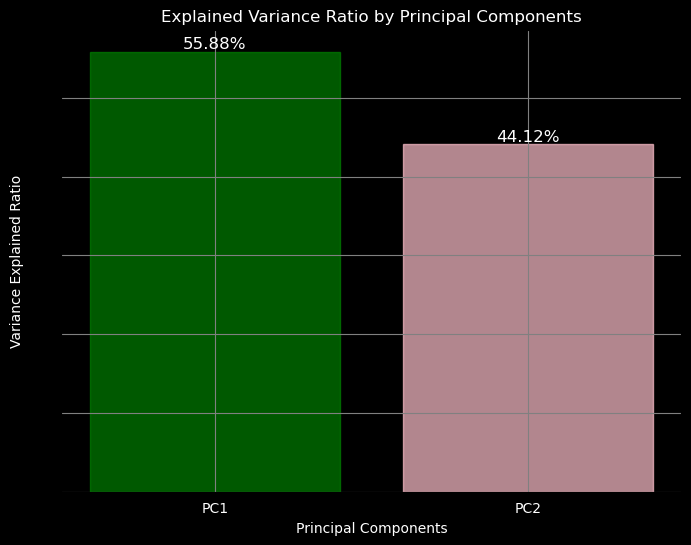

In [43]:
# Plotting the explained variance ratio with percentages on top of the bars

plt.figure(figsize=(8, 6), facecolor='black')

# Customize the bar plot for the first two principal components
bars = plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)

# Customize the colors of the bars
bars[0].set_color('green')  # First principal component (PC1)
bars[1].set_color('pink')   # Second principal component (PC2)

# Set x-axis ticks and labels
plt.xticks([1, 2], ['PC1', 'PC2'], color='white')  # PC1 and PC2 as xticks

# Set axis labels and title with white color for the black background
plt.xlabel('Principal Components', color='white')
plt.ylabel('Variance Explained Ratio', color='white')
plt.title('Explained Variance Ratio by Principal Components', color='white')

# Add percentages on top of the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{explained_variance_ratio[i]*100:.2f}%', 
             ha='center', va='bottom', color='white', fontsize=12)

# Set black background and grid
plt.gca().set_facecolor('black')
plt.grid(True, color='gray')

# Display the plot
plt.show()


# Not doing Good 

In [49]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
california = fetch_california_housing()
X = california.data
y = california.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (PCA works best with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the proper number of components by finding the explained variance ratio
explained_variances = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, ratio in enumerate(explained_variances) if ratio >= 0.95) + 1

# Print number of components explaining 95% variance
print(f"Number of components explaining 95% variance: {n_components}")

# Re-apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply linear regression before PCA
model_before_pca = LinearRegression()
model_before_pca.fit(X_train_scaled, y_train)
y_pred_before_pca = model_before_pca.predict(X_test_scaled)

# Apply linear regression after PCA
model_after_pca = LinearRegression()
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)

# Calculate R^2 and MSE before PCA
r2_before = r2_score(y_test, y_pred_before_pca)
mse_before = mean_squared_error(y_test, y_pred_before_pca)

# Calculate R^2 and MSE after PCA
r2_after = r2_score(y_test, y_pred_after_pca)
mse_after = mean_squared_error(y_test, y_pred_after_pca)

# Display the results
print(f"R^2 before PCA: {r2_before:.4f}")
print(f"MSE before PCA: {mse_before:.4f}")
print(f"R^2 after PCA: {r2_after:.4f}")
print(f"MSE after PCA: {mse_after:.4f}")



Number of components explaining 95% variance: 6
R^2 before PCA: 0.5758
MSE before PCA: 0.5559
R^2 after PCA: 0.4877
MSE after PCA: 0.6714


- PCA often helps when the dataset has many more features than samples (high-dimensional data) or when there is significant multicollinearity (redundant features). Since the California Housing dataset has only 8 features, PCA is unlikely to help as much here.

- Linear regression models tend to perform better when all original features are used, especially if the dataset doesn’t have a lot of redundant features. The California Housing dataset has only 8 features initially, which is not very high-dimensional. PCA might discard useful features, which explains why the model performed worse after applying PCA.

# Doing Good

In [52]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic high-dimensional dataset
# Removed the 'noise' parameter, using 'flip_y' to add some noise to the classification
X, y = make_classification(n_samples=1000, n_features=500, n_informative=50, flip_y=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (PCA works best with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the proper number of components by finding the explained variance ratio
explained_variances = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, ratio in enumerate(explained_variances) if ratio >= 0.95) + 1

# Print number of components explaining 95% variance
print(f"Number of components explaining 95% variance: {n_components}")

# Re-apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply linear regression before PCA
model_before_pca = LinearRegression()
model_before_pca.fit(X_train_scaled, y_train)
y_pred_before_pca = model_before_pca.predict(X_test_scaled)

# Apply linear regression after PCA
model_after_pca = LinearRegression()
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)

# Calculate R^2 and MSE before PCA
r2_before = r2_score(y_test, y_pred_before_pca)
mse_before = mean_squared_error(y_test, y_pred_before_pca)

# Calculate R^2 and MSE after PCA
r2_after = r2_score(y_test, y_pred_after_pca)
mse_after = mean_squared_error(y_test, y_pred_after_pca)

# Display the results
print(f"R^2 before PCA: {r2_before:.4f}")
print(f"MSE before PCA: {mse_before:.4f}")
print(f"R^2 after PCA: {r2_after:.4f}")
print(f"MSE after PCA: {mse_after:.4f}")


Number of components explaining 95% variance: 364
R^2 before PCA: -0.5872
MSE before PCA: 0.3967
R^2 after PCA: 0.1858
MSE after PCA: 0.2035


### Interpretation of $R^2$:

- **$R^2 = 0$**: The model predicts as well as a constant model that predicts the mean of the target variable.
  
- **$R^2 > 0$**: The model predicts better than the mean model. The closer to 1, the better the model fits the data.
  
- **$R^2 < 0$**: The model performs worse than predicting the mean, meaning the model’s predictions introduce more error than just using the mean as the prediction.


In [36]:
data=pd.read_csv("CC_DATA.csv")

In [37]:
data.shape

(8950, 18)

In [38]:
data.head(1)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


In [39]:
data=data.drop("CUST_ID",axis=1)

In [40]:
data.shape

(8950, 17)

In [41]:
data=data.dropna()

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(data)

In [43]:
from sklearn.decomposition import PCA
pc=PCA()
pca_inp=pc.fit_transform(inp_sc)

In [44]:
pd.DataFrame(pca_inp).head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.696395,-1.122584,-0.491562,0.719521,-0.07983,-0.118234,-0.808993,-0.09397,-0.01619,0.082402,-0.216529,0.053144,-0.073513,-0.19711,0.137454,0.046683,0.000168


In [45]:
inp_sc.shape,pca_inp.shape

((8636, 17), (8636, 17))

In [46]:
pd.DataFrame(pc.explained_variance_ratio_).round(2)

,0
0,0.27
1,0.20
2,0.09
3,0.08
4,0.06
5,0.06
6,0.05
7,0.04
8,0.04
9,0.03


In [47]:
cum_var=np.cumsum(pc.explained_variance_ratio_)
(cum_var<0.85).sum()

7

In [52]:
# first eigenvector
pd.DataFrame([pc.components_[0,:]],columns=data.columns)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.091986,0.109812,0.412151,0.346775,0.337056,-0.030588,0.323665,0.294761,0.277226,-0.099145,-0.05696,0.391067,0.210052,0.263725,0.059326,0.130565,0.077919


In [53]:
eig1=pd.DataFrame([pc.components_[0,:]],columns=data.columns)

In [54]:
eig1.T.sort_values(0,ascending=False)

,0
PURCHASES,0.412151
PURCHASES_TRX,0.391067
ONEOFF_PURCHASES,0.346775
INSTALLMENTS_PURCHASES,0.337056
PURCHASES_FREQUENCY,0.323665
ONEOFF_PURCHASES_FREQUENCY,0.294761
PURCHASES_INSTALLMENTS_FREQUENCY,0.277226
PAYMENTS,0.263725
CREDIT_LIMIT,0.210052
PRC_FULL_PAYMENT,0.130565
